# **----------------------Results-------------------------**

## 1. Online orders taking restaurants are higher in dataset.

## 2. Ratings are higher in number in the range of 3.6 to 4.0

## 3. If cost of two people ranges from 1000 to 1500 then the ratings will be higher

## 4. Busier areas have high traffic which causes good ratings

## 5. People spend less money on desset shops and more in drinks and nyt life


In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
sns.set_style('darkgrid')

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/zomato.csv')


In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [ ]:
df.shape

(51717, 17)

In [ ]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
df.isnull().sum()

In [ ]:
df.drop(['url','address','phone','location','dish_liked','reviews_list','menu_item'],axis=1,inplace=True)


In [ ]:
df=df.rename(columns={"name":'Name','rate':'Ratings','votes':'Votes','rest_type':'Rest_Type','cuisines':'Cuisines','approx_cost(for two people)':'Cost','listed_in(type)':'Type','listed_in(city)':'City','online_order':'Takes online orders?','book_table':'Has table booking?'})

In [ ]:
df.sample(5)

,Name,Takes online orders?,Has table booking?,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City
43925,Capri Gastrobar,No,Yes,4.3 /5,300,"Bar, Casual Dining","Mediterranean, Italian, Asian","1,200",Pubs and bars,MG Road
50306,Smoor,Yes,No,4.4 /5,390,"Dessert Parlor, Cafe","Desserts, Cafe, Continental",700,Delivery,Whitefield
21963,Kabab Mehal,Yes,No,3.7/5,66,Quick Bites,"Kebab, North Indian, Fast Food, Beverages",400,Delivery,JP Nagar
38504,Krispy Kreme,Yes,No,4.0 /5,47,Dessert Parlor,"Desserts, Beverages",300,Desserts,Lavelle Road
4518,Natural Ice Cream,No,No,4.3/5,384,Dessert Parlor,"Ice Cream, Desserts",150,Desserts,Bellandur


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  51717 non-null  object
 1   Takes online orders?  51717 non-null  object
 2   Has table booking?    51717 non-null  object
 3   Ratings               43942 non-null  object
 4   Votes                 51717 non-null  int64 
 5   Rest_Type             51490 non-null  object
 6   Cuisines              51672 non-null  object
 7   Cost                  51371 non-null  object
 8   Type                  51717 non-null  object
 9   City                  51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [ ]:
sum(df.duplicated())

124

In [ ]:
df = df.drop_duplicates()

In [ ]:
def name_clean(text):
    return re.sub(r"[^a-zA-Z0-9 ]", "", text)

df['Name'] = df['Name'].apply(lambda x: name_clean(x))

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns

['Votes']

In [ ]:
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()
categorical_columns

['Name',
 'Takes online orders?',
 'Has table booking?',
 'Ratings',
 'Rest_Type',
 'Cuisines',
 'Cost',
 'Type',
 'City']

In [ ]:
for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [ ]:
print(df[categorical_columns].isnull().sum())


Name                    0
Takes online orders?    0
Has table booking?      0
Ratings                 0
Rest_Type               0
Cuisines                0
Cost                    0
Type                    0
City                    0
dtype: int64


In [ ]:
if 'Ratings' in df.columns:
    # Replace duplicates in numeric columns (excluding 'Ratings') with mean
    df[numeric_columns] = df.groupby(df.columns.difference(['Name', 'Ratings']).tolist())[numeric_columns].transform('mean')
else:
    # Replace duplicates in numeric columns with mean
    df[numeric_columns] = df.groupby(df.columns.difference(['Name']).tolist())[numeric_columns].transform('mean')

In [ ]:
df['Ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
print(df['Ratings'])

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NEW
51714       NEW
51715    4.3 /5
51716    3.4 /5
Name: Ratings, Length: 51593, dtype: object


In [ ]:
df["Ratings"]=df["Ratings"].replace("NEW", np.nan)
df['Ratings']=df['Ratings'].replace('NaN',np.nan)
df['Ratings']=df['Ratings'].replace('-',np.nan)
df['Ratings']=df['Ratings'].replace('nan',np.nan)

## function to remove '/5'
def remove_5(value: str):
    if type(value)==str:
        value_new=value.split('/')[0]
        return value_new
    return value
df['Ratings']=df['Ratings'].apply(remove_5)

## converting to float type data

df['Ratings']=df['Ratings'].astype(float)

print(df['Ratings'])
print(df['Ratings'].dtypes)
# Assuming 'ratings' is the column you want to convert


0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: Ratings, Length: 51593, dtype: float64
float64


In [ ]:
## function to remove commas and convert the values
## into numbers
def cost(value):
    value = str(value)
    if "," in value:
        value = float(value.replace(",",""))
        return value
    else:
        return float(value)
df['Cost'] = df['Cost'].apply(cost)
print(df['Cost'].head())

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: Cost, dtype: float64


In [ ]:
print(df.isnull().sum())

print([features for features in df.columns if df[features].isnull().sum()>0])

Name                        0
Takes online orders?        0
Has table booking?          0
Ratings                 10003
Votes                       0
Rest_Type                   0
Cuisines                    0
Cost                        0
Type                        0
City                        0
dtype: int64
['Ratings']


<Axes: >

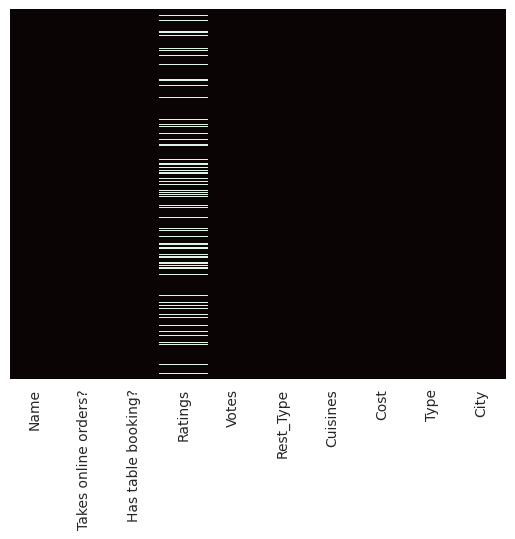

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51593 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  51593 non-null  object 
 1   Takes online orders?  51593 non-null  object 
 2   Has table booking?    51593 non-null  object 
 3   Ratings               41590 non-null  float64
 4   Votes                 51593 non-null  float64
 5   Rest_Type             51593 non-null  object 
 6   Cuisines              51593 non-null  object 
 7   Cost                  51593 non-null  float64
 8   Type                  51593 non-null  object 
 9   City                  51593 non-null  object 
dtypes: float64(3), object(7)
memory usage: 4.3+ MB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['Ratings','Votes', 'Cost']

# Assuming df is your DataFrame
# Select only the numeric columns you want to scale
numeric_data = df[numeric_columns]

# Fit scaler on training data
scaler = MinMaxScaler().fit(numeric_data)

# Transform training data
X_train_norm = scaler.transform(numeric_data)


## Data cleaning using KNN

In [ ]:
from sklearn.impute import KNNImputer

def KNNImpute(df):
    # Extract numerical columns for kNN imputation
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Initialize KNNImputer
    imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed

    # Perform kNN imputation on numeric columns
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

    # Encode categorical columns
    for column in df.columns[~df.columns.isin(['rate', 'cost', 'votes'])]:
        df[column] = df[column].factorize()[0]

    return df

# Apply the KNNImpute function to a copy of the DataFrame
df = KNNImpute(df.copy())


In [ ]:
df.columns

Index(['Name', 'Takes online orders?', 'Has table booking?', 'Ratings',
       'Votes', 'Rest_Type', 'Cuisines', 'Cost', 'Type', 'City'],
      dtype='object')

In [ ]:
df.isnull().sum()

Name                    0
Takes online orders?    0
Has table booking?      0
Ratings                 0
Votes                   0
Rest_Type               0
Cuisines                0
Cost                    0
Type                    0
City                    0
dtype: int64

## Data cleaning using mean

In [ ]:
# df.fillna(df.mean(), inplace=True)

## Data cleaning using linear regression

In [ ]:
# from sklearn.experimental import enable_iterative_imputer  # noqa
# from sklearn.impute import IterativeImputer
# from sklearn.linear_model import LinearRegression
# import pandas as pd

# # Replace 'column1', 'column2', etc., with the actual column names from your dataset
# # Example: Using only a subset of columns for demonstration
# selected_columns = ['Votes', 'Ratings', 'Cost']
# # Create a DataFrame with selected columns
# selected_data = df[selected_columns]
# # Initialize IterativeImputer with a linear regression model
# imputer = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=0)
# # Perform imputation on the selected data
# selected_data_imputed = imputer.fit_transform(selected_data)
# # Convert the imputed array back to a DataFrame
# df_imputed = pd.DataFrame(selected_data_imputed, columns=selected_columns)
# # Replace the original columns in the original DataFrame with the imputed values
# df[selected_columns] = df_imputed[selected_columns]

In [ ]:
# df.isnull().sum()

0    30347
1    21246
Name: Takes online orders?, dtype: int64


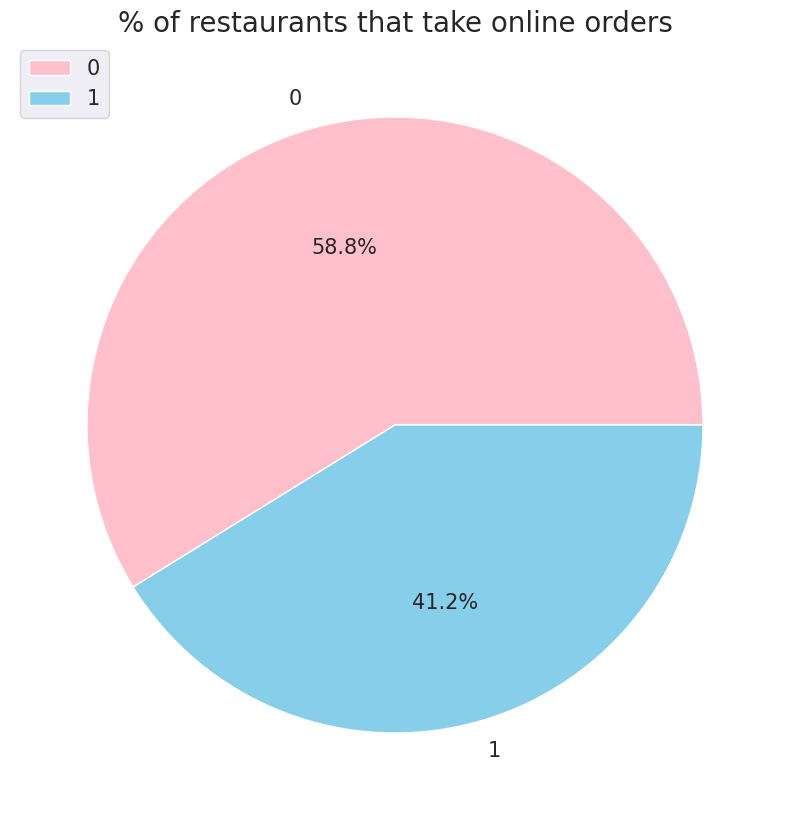

In [ ]:
# How many restaurants in Bangalore take online orders?
print(df['Takes online orders?'].value_counts())
plt.figure(figsize=(30,10))
df['Takes online orders?'].value_counts().plot(kind='pie',colors=['pink','skyblue'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that take online orders',size=20)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 15})

## online orders are greater in the dataset

1    45177
0     6416
Name: Has table booking?, dtype: int64


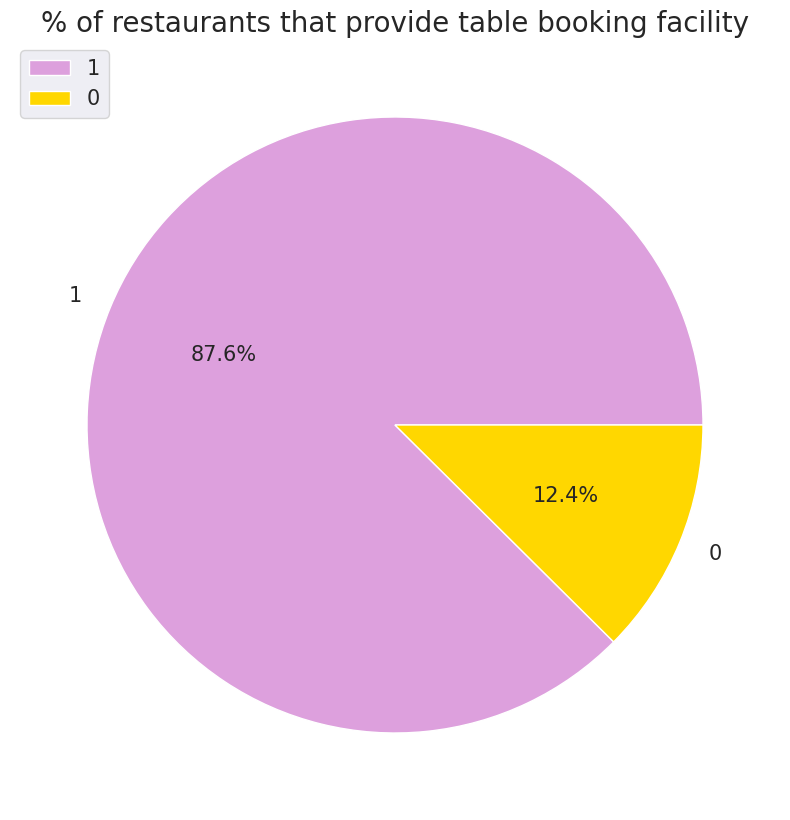

In [ ]:
# What percentage of restaurants offer table booking facilities?
print(df['Has table booking?'].value_counts())
plt.figure(figsize=(30,10))
df['Has table booking?'].value_counts().plot(kind='pie',colors=['plum','gold'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that provide table booking facility',size=20)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 15})

## restaurants without table booking are greater

Text(0, 0.5, 'Ratings Count')

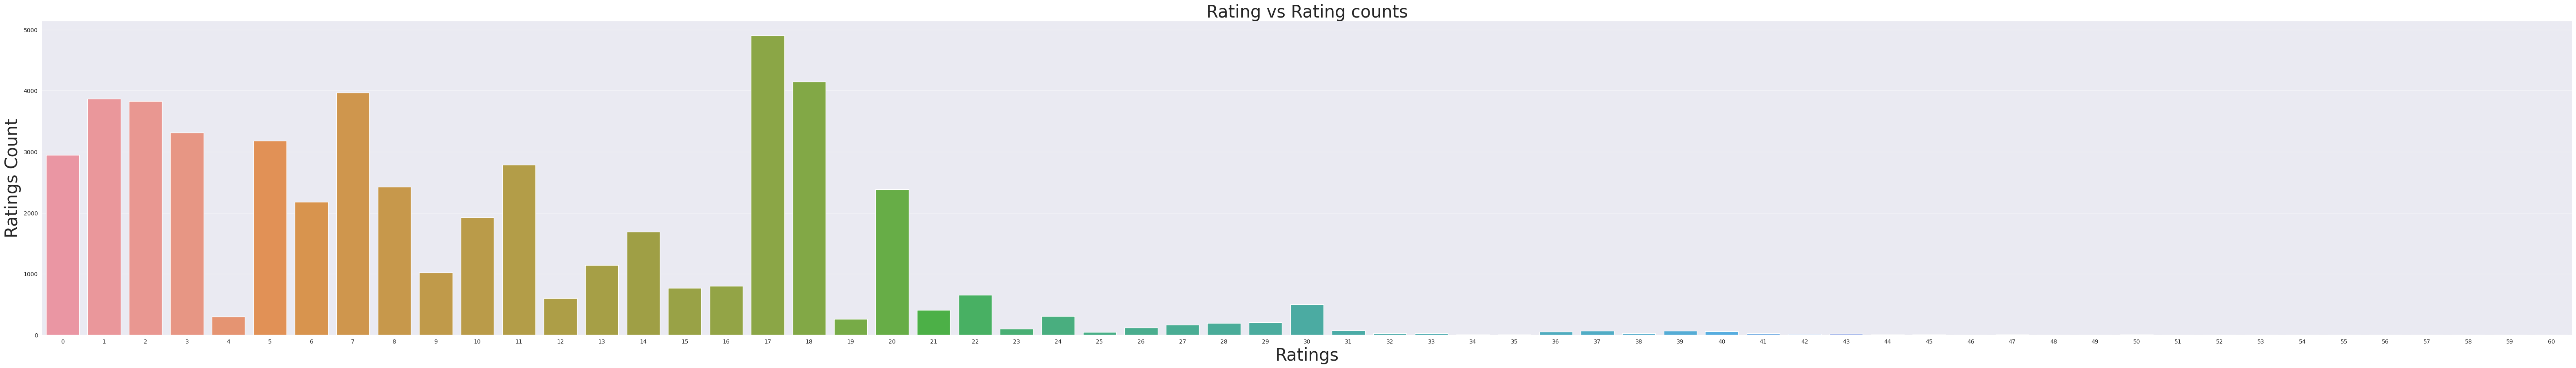

In [ ]:
# What was the most common rating?
ratings=df.groupby(['Ratings']).size().reset_index().rename(columns={0:"Rating_Count"})
plt.figure(figsize=(80,10))
sns.barplot(x='Ratings',y='Rating_Count',data=ratings)
plt.title('Rating vs Rating counts',size=30)
plt.xlabel('Ratings',size=30)
plt.ylabel('Ratings Count',size=30)

### Ratings are in the high in number in the range of 3.6 ot 4.0

<ipython-input-47-9b39606765fe>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, -10.0, '-10'),
 Text(0, 0.0, '0'),
 Text(0, 10.0, '10'),
 Text(0, 20.0, '20'),
 Text(0, 30.0, '30'),
 Text(0, 40.0, '40'),
 Text(0, 50.0, '50'),
 Text(0, 60.0, '60'),
 Text(0, 70.0, '70'),
 Text(0, 80.0, '80')]

<Figure size 3000x1000 with 0 Axes>

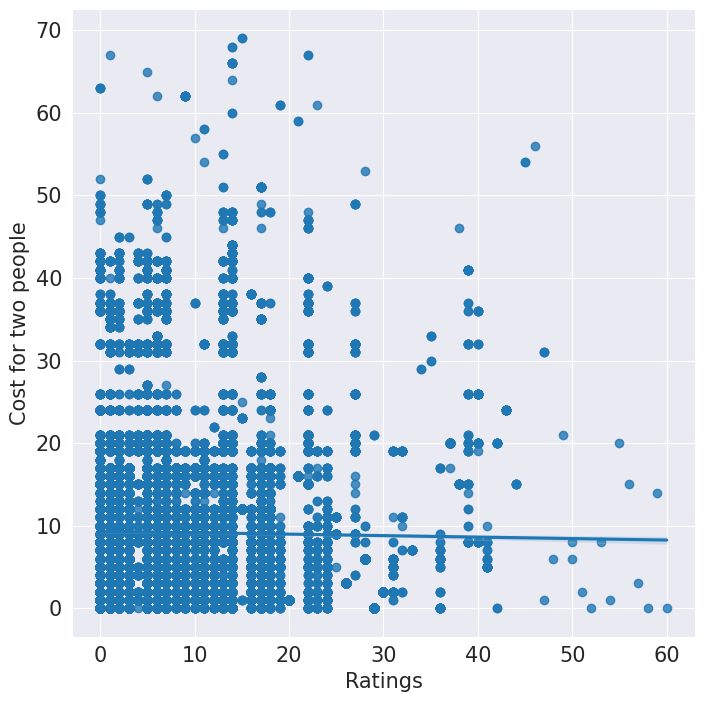

In [ ]:
# is there any correlation between the two people’s approximated cost and a restaurant’s ratings?
plt.figure(figsize=(30,10))
sns.lmplot(x='Ratings',y='Cost',data=df,height=7)
plt.xlabel('Ratings',size=15)
plt.ylabel('Cost for two people',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

## if cost of two people ranges from 1000-1500, then the ratings will be higher

In [ ]:
# Top 5 cities in Bangalore that have a maximum number of high and low-rated restaurants.
a=df.groupby('City')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)
print(a.head())

    City    Ratings
8      8  12.124694
5      5  11.195122
1      1  11.064975
22    22  10.966204
29    29  10.928881


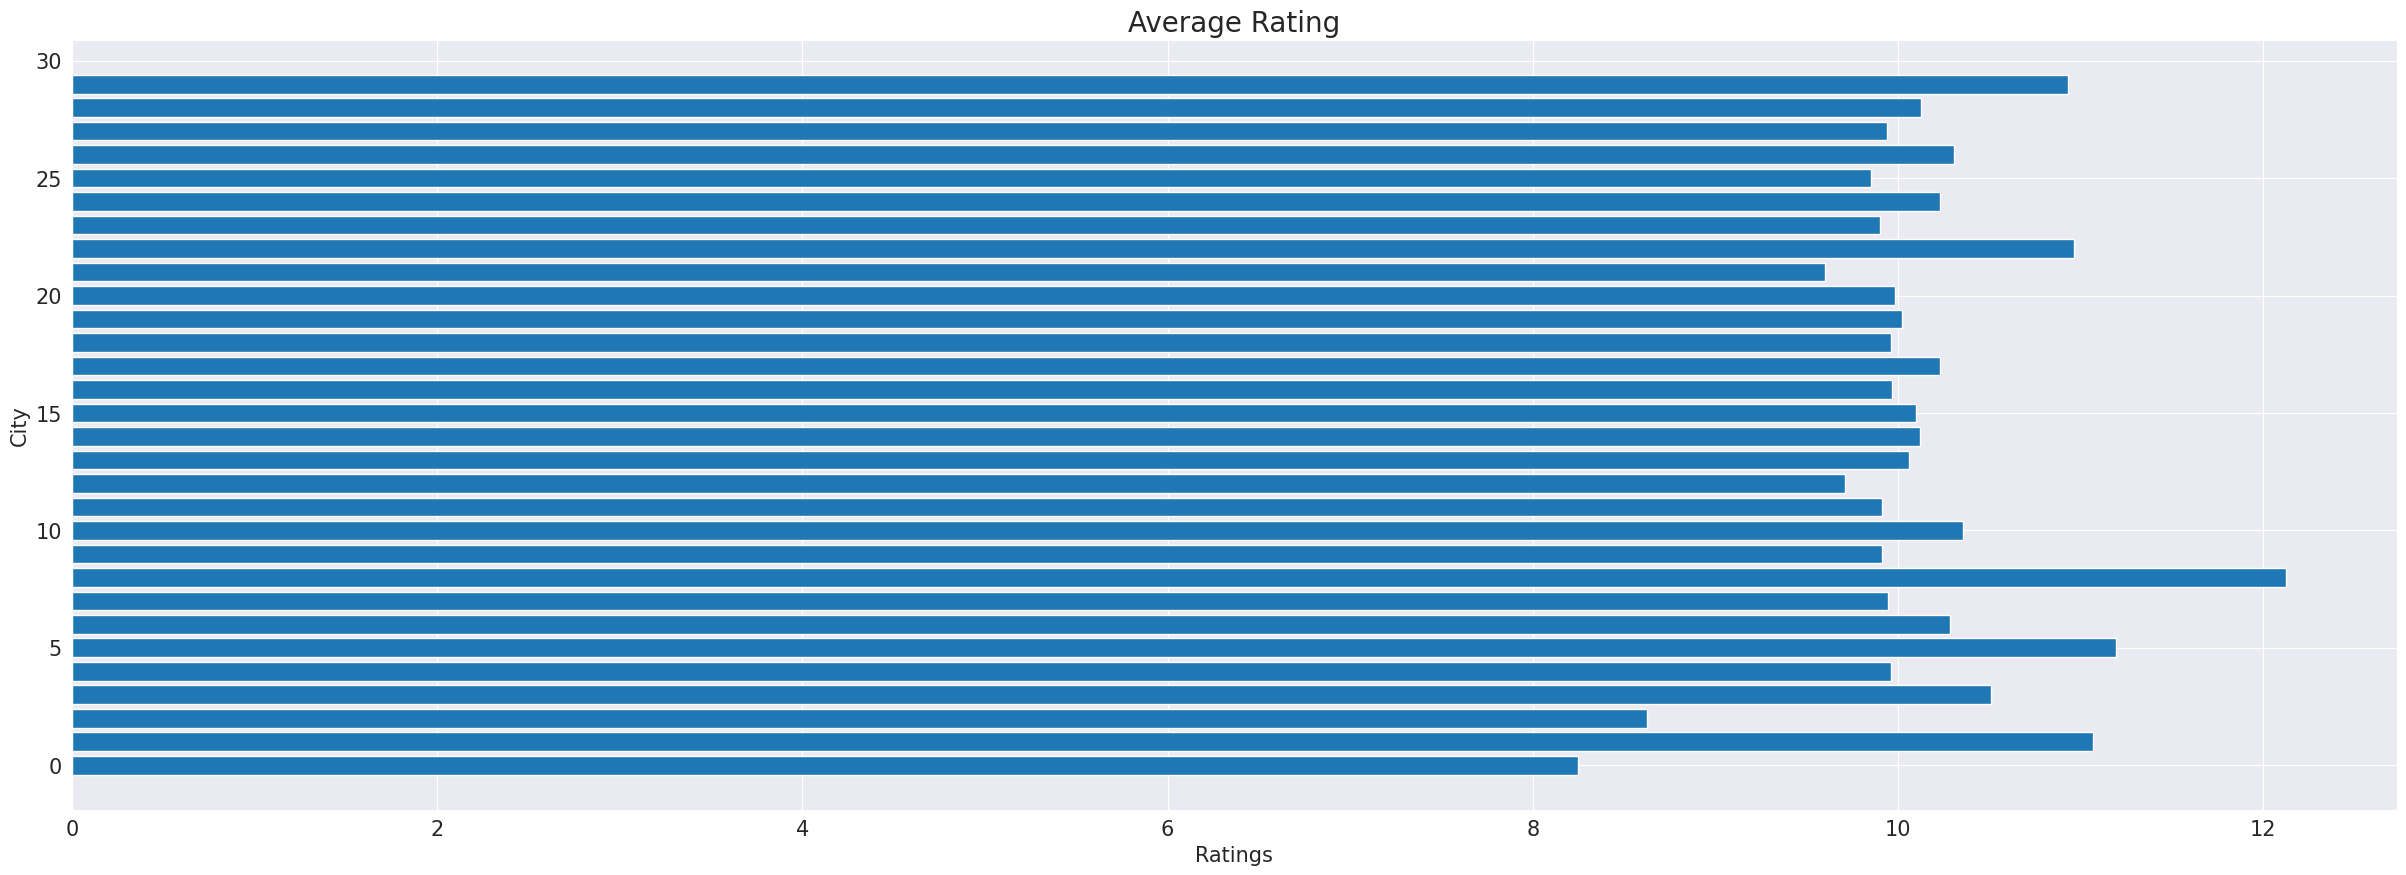

In [ ]:
plt.figure(figsize=(30,10))
plt.barh(a.City,a.Ratings)
plt.xlabel('Ratings',size=15)
plt.ylabel('City',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Average Rating',size=20)
plt.show()


## Busier areas have high traffic causes good ratings.
##Then areas with rich people have high ratings

In [ ]:
# Which cuisine do customers like the most?
b=df.groupby('Cuisines')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)
print(b.head(5))

      Cuisines  Ratings
783        783     40.0
2621      2621     40.0
1454      1454     40.0
728        728     39.0
1930      1930     38.0


   Type       Cost
1     1   6.861288
2     2   7.751286
3     3   8.177208
4     4   9.717786
0     0  19.489773
6     6  21.587896
5     5  23.611517


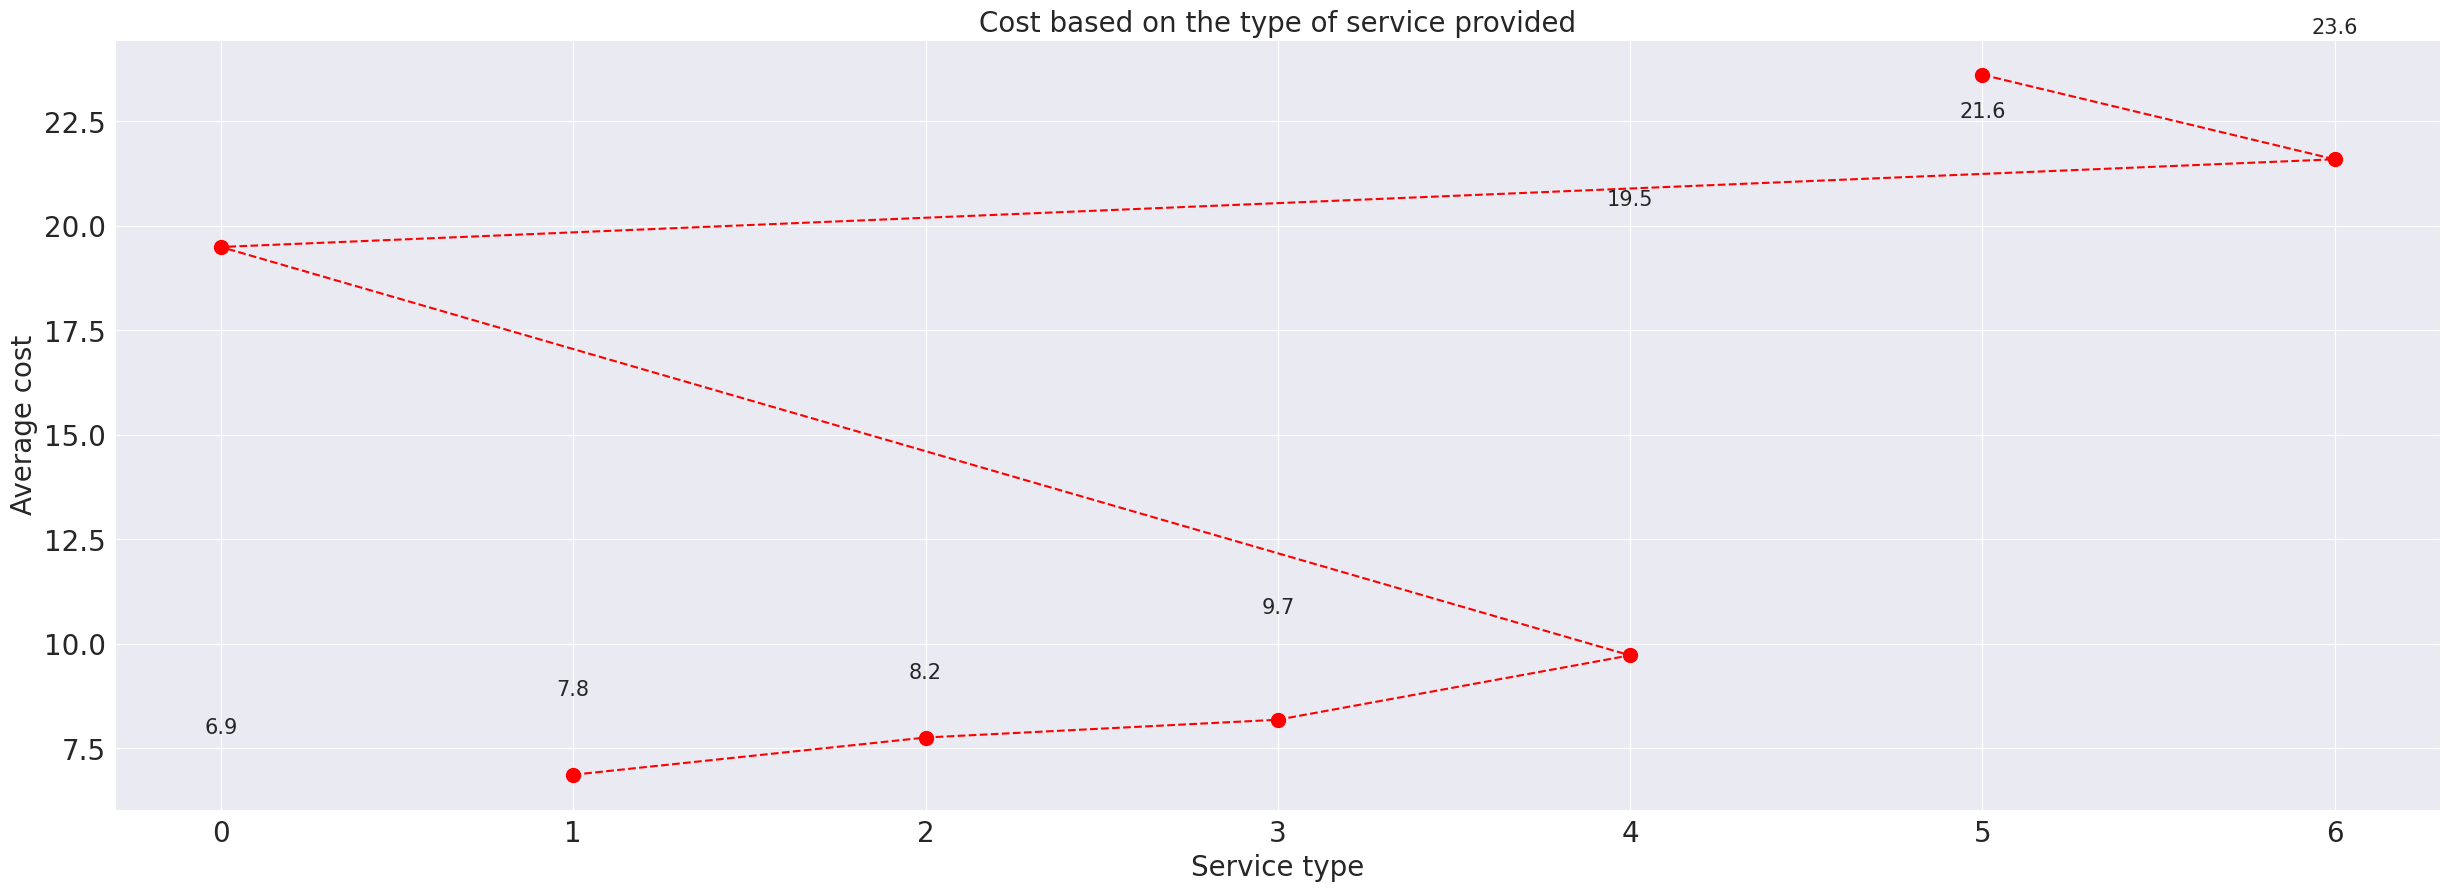

In [ ]:

d=df.groupby('Type')['Cost'].mean().reset_index().sort_values(by='Cost')
print(d)
plt.figure(figsize=(30,10))
plt.plot(d['Type'],d['Cost'],'o--r',ms=10)
plt.xlabel('Service type',size=20)
plt.ylabel('Average cost',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Cost based on the type of service provided',size=20)
for i,e in enumerate(d.Cost):
    plt.text(i,e+1,round(e,1),fontsize=15,horizontalalignment='center')
plt.show()

## People spends less money on dessert shops and more on drins and night life.

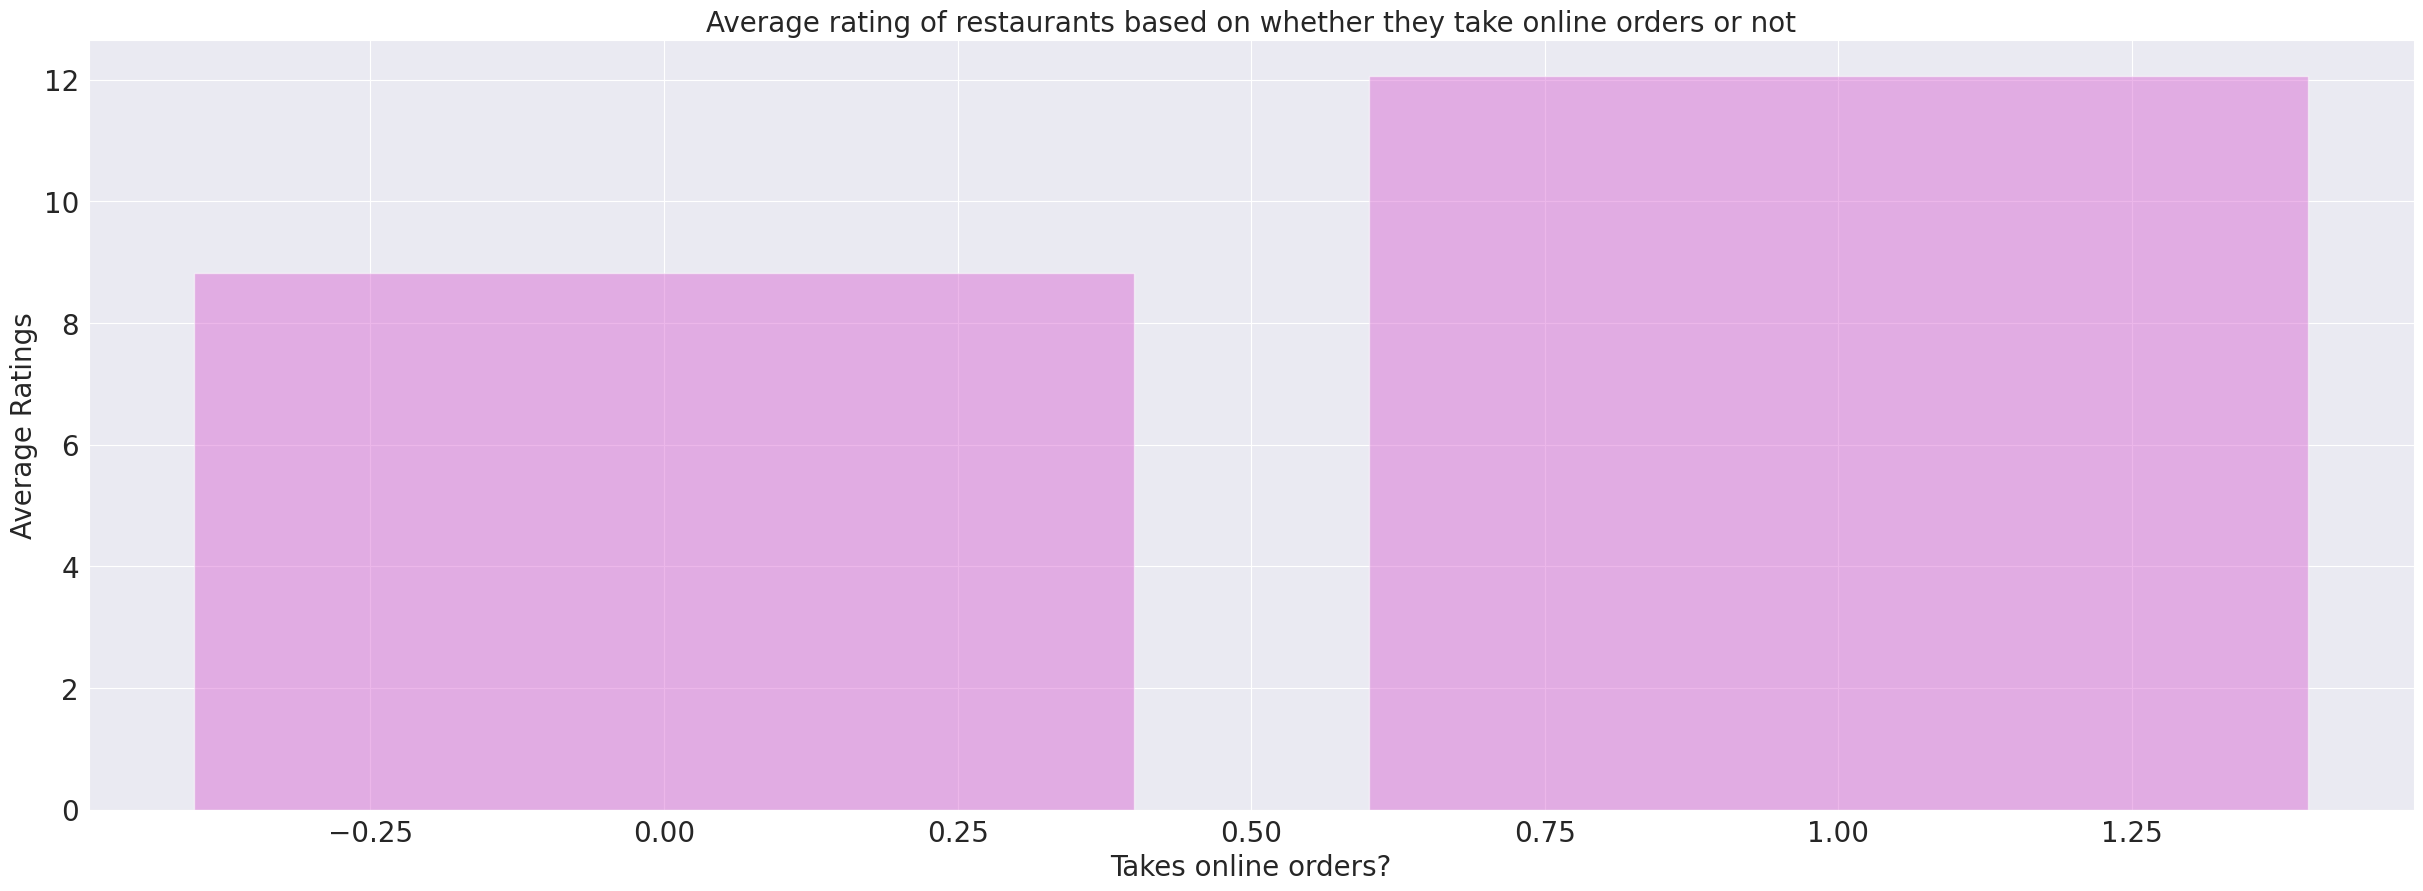

In [ ]:

grp1=df.groupby('Takes online orders?')['Ratings'].mean().reset_index()
plt.figure(figsize=(30,10))
plt.bar(grp1['Takes online orders?'],grp1['Ratings'],alpha=0.5,color='orchid')
plt.xlabel('Takes online orders?',size=20)
plt.ylabel('Average Ratings',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Average rating of restaurants based on whether they take online orders or not',size=20)
plt.show()

There is only a small difference in ratings based on restaurants taking online orders or not.

In [ ]:

grp2=df.groupby('Name')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)[0:10]
print(grp2)

      Name    Ratings
5348  5348  46.000000
4790  4790  45.000000
3073  3073  44.000000
2981  2981  43.000000
2975  2975  42.000000
3688  3688  41.000000
3884  3884  40.000000
1927  1927  40.000000
8250  8250  40.000000
3415  3415  39.714286


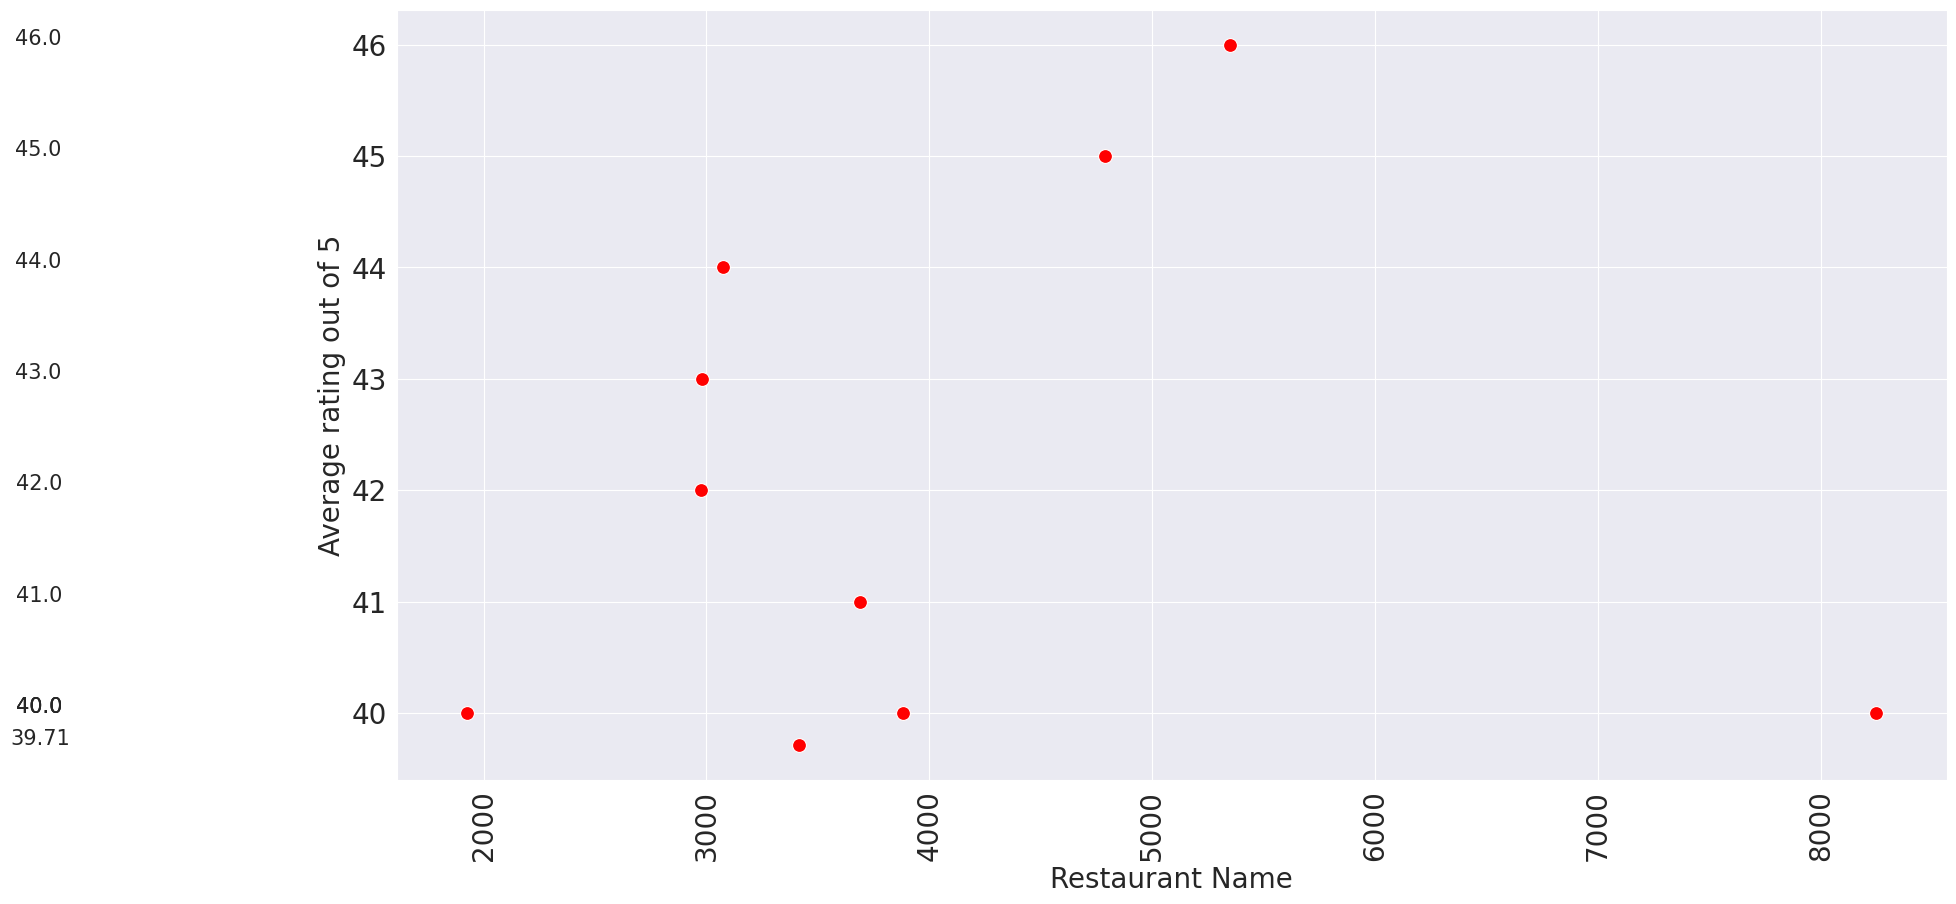

In [ ]:
plt.figure(figsize=(20, 10))  # Adjust the size according to your needs
sns.scatterplot(x='Name', y='Ratings', data=grp2, s=100, color='red')

for i, e in enumerate(grp2.Ratings):
    plt.text(i, e, round(e, 2), fontsize=15, horizontalalignment='center')

plt.xlabel('Restaurant Name', size=20)
plt.ylabel('Average rating out of 5', size=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=90)
plt.show()


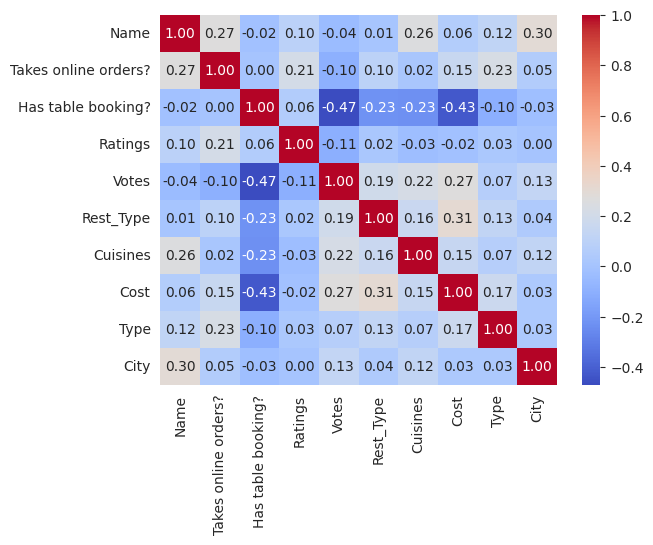

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


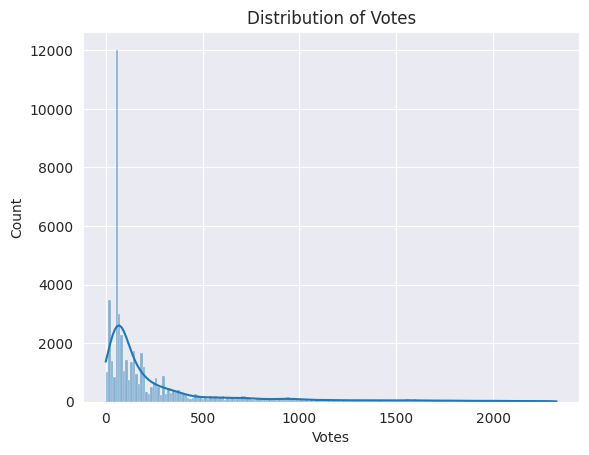

In [ ]:
sns.histplot(df['Votes'], kde=True)
plt.title('Distribution of Votes')
plt.show()

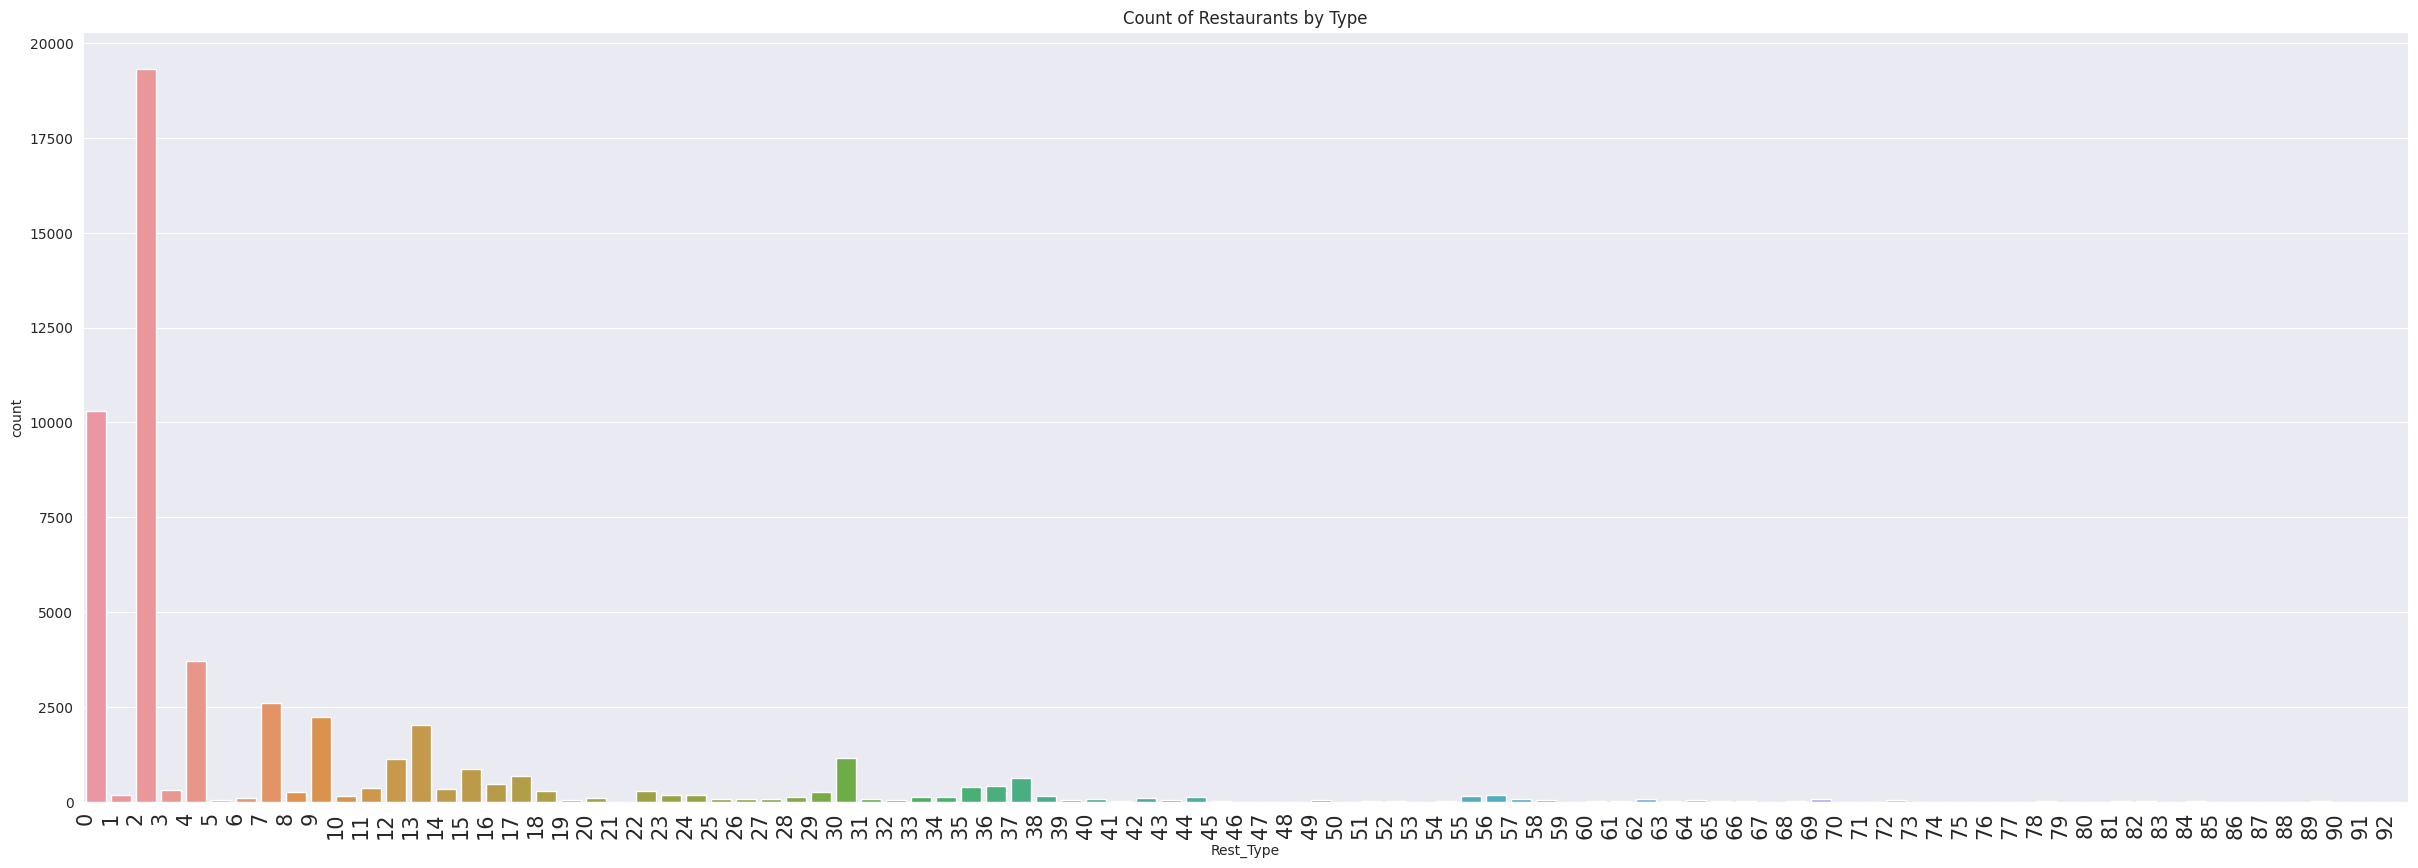

In [ ]:
plt.figure(figsize=(30, 10))
sns.countplot(x='Rest_Type', data=df )
plt.xticks(rotation=90, ha='right', size=15)
plt.title('Count of Restaurants by Type')
plt.show()

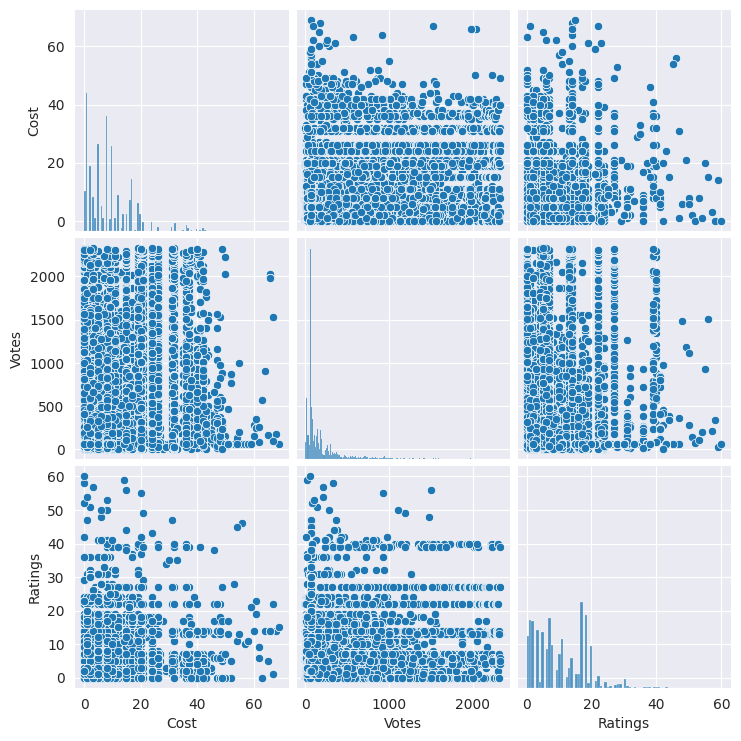

In [ ]:
sns.pairplot(df[['Cost', 'Votes', 'Ratings']])
plt.show()

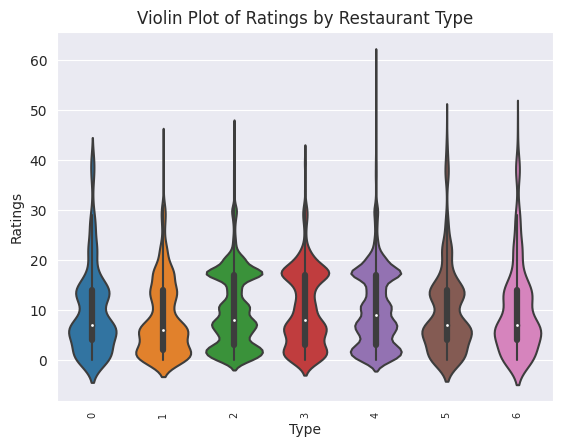

In [ ]:
sns.violinplot(x='Type', y='Ratings', data=df)
plt.xticks(rotation=90, size=7)
plt.title('Violin Plot of Ratings by Restaurant Type')
plt.show()

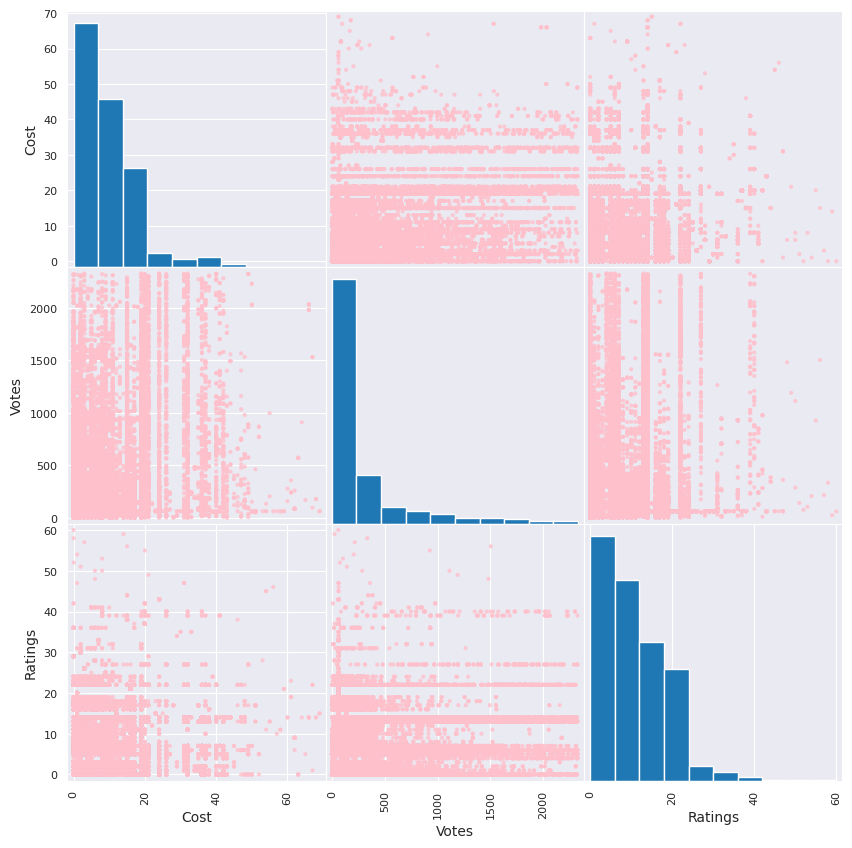

In [ ]:

from pandas.plotting import scatter_matrix

scatter_matrix(df[['Cost', 'Votes', 'Ratings']], alpha=0.8, figsize=(10, 10), c="pink")
plt.show()

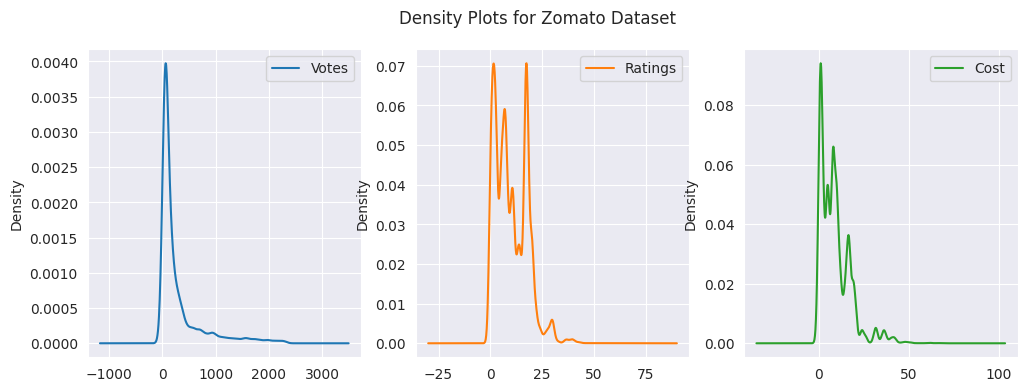

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

selected_columns = ['Votes', 'Ratings', 'Cost']

# Create a DataFrame with selected columns
selected_data = df[selected_columns]

# Plot density plots for selected columns
selected_data.plot(kind='density', subplots=True, layout=(1, len(selected_columns)), sharex=False, figsize=(12, 4))
plt.suptitle('Density Plots for Zomato Dataset')
plt.show()


In [ ]:
df.columns

Index(['Name', 'Takes online orders?', 'Has table booking?', 'Ratings',
       'Votes', 'Rest_Type', 'Cuisines', 'Cost', 'Type', 'City'],
      dtype='object')

In [ ]:

df['Takes online orders?'].replace(('Yes', 'No'), (True, False), inplace=True)

df['Has table booking?'].replace(('Yes', 'No'), (True, False), inplace=True)

print(df['Takes online orders?'].unique())

[0 1]


In [ ]:
df

,Name,Takes online orders?,Has table booking?,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City
0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,1,0,0,0
2,2,0,1,1,2,1,2,0,0,0
3,3,1,1,2,3,2,3,1,0,0
4,4,1,1,1,4,0,4,2,0,0
...,...,...,...,...,...,...,...,...,...,...
51712,8676,1,1,3,107,17,256,20,6,29
51713,8681,1,1,30,63,17,255,2,6,29
51714,8740,1,1,2,63,17,255,36,6,29
51715,8736,1,0,14,659,17,255,40,6,29


In [ ]:
df.columns

Index(['Name', 'Takes online orders?', 'Has table booking?', 'Ratings',
       'Votes', 'Rest_Type', 'Cuisines', 'Cost', 'Type', 'City'],
      dtype='object')

In [ ]:
df.isnull().sum()

Name                    0
Takes online orders?    0
Has table booking?      0
Ratings                 0
Votes                   0
Rest_Type               0
Cuisines                0
Cost                    0
Type                    0
City                    0
dtype: int64

In [ ]:
def Encode(df):
    for column in df.columns[~df.columns.isin(['Ratings', 'Cost', 'Votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = Encode(df.copy())
df_en

,Name,Takes online orders?,Has table booking?,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City
0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,1,0,0,0
2,2,0,1,1,2,1,2,0,0,0
3,3,1,1,2,3,2,3,1,0,0
4,4,1,1,1,4,0,4,2,0,0
...,...,...,...,...,...,...,...,...,...,...
51712,8676,1,1,3,107,17,256,20,6,29
51713,8681,1,1,30,63,17,255,2,6,29
51714,8740,1,1,2,63,17,255,36,6,29
51715,8736,1,0,14,659,17,255,40,6,29


In [ ]:
from sklearn.model_selection import train_test_split

# Selecting specific columns
selected_columns = ['Takes online orders?','Has table booking?','Votes', 'Rest_Type', 'Cuisines', 'Cost', 'Type', 'City']
X = df_en[selected_columns]
y = df_en['Ratings']

# Getting Test and Training Set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=353)

print(df_en.isnull().sum())


Name                    0
Takes online orders?    0
Has table booking?      0
Ratings                 0
Votes                   0
Rest_Type               0
Cuisines                0
Cost                    0
Type                    0
City                    0
dtype: int64


In [ ]:
#Prepare a Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.051182450723167405

In [ ]:
#Prepare a Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=5)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.6742222968614575

In [ ]:
#Prepare a Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=5)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7337165159846786

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.tree = None

    def mean_squared_error(self, y):
        return np.mean((y - np.mean(y))**2)

    def find_best_split(self, X, y):
        num_features = X.shape[1]
        best_feature, best_threshold, best_loss = None, None, np.inf

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                left_loss = self.mean_squared_error(y[left_mask])
                right_loss = self.mean_squared_error(y[right_mask])

                total_loss = left_loss + right_loss

                if total_loss < best_loss:
                    best_feature, best_threshold, best_loss = feature, threshold, total_loss

        return best_feature, best_threshold

    def grow_tree(self, X, y, depth):
        if depth is None or depth == 0 or y is None or len(y) == 0 or len(np.unique(y)) == 1 or len(y) < self.min_samples_leaf:
            return np.mean(y)

        feature, threshold = self.find_best_split(X, y)

        if feature is None:
            return np.mean(y)

        left_mask = X[:, feature] <= threshold
        right_mask = ~left_mask

        left_subtree = self.grow_tree(X[left_mask, :], y[left_mask], depth - 1 if depth is not None else None)
        right_subtree = self.grow_tree(X[right_mask, :], y[right_mask], depth - 1 if depth is not None else None)

        return (feature, threshold, left_subtree, right_subtree)

    def fit(self, X, y):
        self.tree = self.grow_tree(X, y, self.max_depth)

    def predict_single(self, tree, sample):
        if isinstance(tree, (int, float)):
            return tree

        feature, threshold, left_subtree, right_subtree = tree

        if sample[feature] <= threshold:
            return self.predict_single(left_subtree, sample)
        else:
            return self.predict_single(right_subtree, sample)

    def predict(self, X):
        return np.array([self.predict_single(self.tree, sample) for sample in X])

class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_leaf=1, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)

        for _ in range(self.n_estimators):
            row_indices = np.random.choice(len(X), len(X), replace=True)
            X_bootstrap = X.iloc[row_indices, :]
            y_bootstrap = y.iloc[row_indices]

            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_leaf=self.min_samples_leaf)
            tree.fit(X_bootstrap.values, y_bootstrap.values)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X.values) for tree in self.trees])
        return np.mean(predictions, axis=0)

# Assuming you have X_train, y_train, X_test, y_test as pandas DataFrames
# Replace this with your actual data
X_train = pd.DataFrame({'feature1': np.random.rand(100), 'feature2': np.random.rand(100)})
y_train = pd.Series(np.random.rand(100))

X_test = pd.DataFrame({'feature1': np.random.rand(50), 'feature2': np.random.rand(50)})
y_test = pd.Series(np.random.rand(50))

model = RandomForestRegressor(n_estimators=500, max_depth=None, min_samples_leaf=5, random_state=329)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)


-0.06532356082401858

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

class ExtraTreesRegressor:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_leaf=1, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)

        for _ in range(self.n_estimators):
            row_indices = np.random.choice(len(X), len(X), replace=True)
            X_bootstrap = X.iloc[row_indices, :]
            y_bootstrap = y.iloc[row_indices]

            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_leaf=self.min_samples_leaf)
            tree.fit(X_bootstrap.values, y_bootstrap.values)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X.values) for tree in self.trees])
        return np.mean(predictions, axis=0)

# Assuming you have X_train, y_train, X_test, y_test as pandas DataFrames
# Replace this with your actual data
X_train = pd.DataFrame({'feature1': np.random.rand(100), 'feature2': np.random.rand(100)})
y_train = pd.Series(np.random.rand(100))

X_test = pd.DataFrame({'feature1': np.random.rand(50), 'feature2': np.random.rand(50)})
y_test = pd.Series(np.random.rand(50))

model = ExtraTreesRegressor(n_estimators=500, max_depth=None, min_samples_leaf=5, random_state=329)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

r2_score_value = r2_score(y_test, y_predict)
print(f"R-squared: {r2_score_value}")


R-squared: -0.030949986236281868


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


RForestClassifier = RandomForestClassifier(n_estimators=500, random_state=329, min_samples_leaf=5)

# Fit the classifier on training data
RForestClassifier.fit(x_train, y_train)

# Make predictions for classification
y_predict = RForestClassifier.predict(x_test)

# Calculate accuracy (or use other appropriate metrics for classification)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy}")


ValueError: Found input variables with inconsistent numbers of samples: [46433, 100]

In [ ]:
#Prepare a Extra tree regressor

from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

ValueError: Found input variables with inconsistent numbers of samples: [46433, 100]

## We got higher accuray of 84% in ExtraTreesRegressor